La media de IMC es:  23.385238095238098
La mediana de IMC es:  23.67
La varianza de IMC es:  9.154024943310656
La moda es de IMC:  23.88


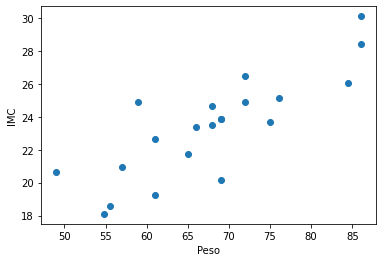

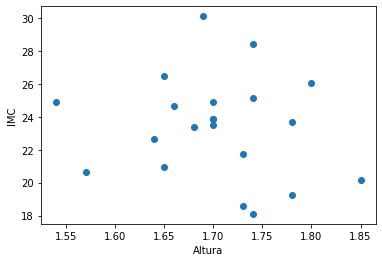

Las personas en rangos no saludables son:  5
En terminos porcentuales, el 23.80952380952381  porciento


In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats #Importamos las herramientas a utilizar

file=r'tabla.csv'
reader=csv.reader(open(file)) #Leemos el archivo
L=[]
for row in reader:
    L.append(row) #Guardamos los datos del archivo en una lista
L.pop(0)
IMC=[]
altura=[]
peso=[]
for imc in L:     #Separamos en listas el peso, la altura y el IMC
    IMC.append(float(imc[3]))
    altura.append(float(imc[1]))
    peso.append(float(imc[2]))
IMC=np.array(IMC)
peso=np.array(peso)
altura=np.array(altura)

mediaimc=np.mean(IMC) #Calculamos las medidas requeridas
medianaimc=np.median(IMC)
varianzaimc=np.var(IMC)
modaimc=stats.mode(IMC)
print("La media de IMC es: " , mediaimc) #Mostramos los valores de las medidas requeridas
print("La mediana de IMC es: ",medianaimc)
print("La varianza de IMC es: ", varianzaimc)
print("La moda es de IMC: ", float(modaimc[0]))

plt.plot(peso,IMC,'o') #Graficamos el peso contra el IMC
plt.xlabel('Peso')
plt.ylabel('IMC')
plt.show()

plt.plot(altura,IMC,'o') #Ahora graficamos la altura contra el IMC
plt.xlabel('Altura')
plt.ylabel('IMC')
plt.show()


def NOesSaludable(M): #Creamos una función que verifica si la persona es saludable o no según su IMC
    contador=0
    for i in M:
        if(i<18.5 or i>25.6):
            contador+=1
    return contador

print("Las personas en rangos no saludables son: ",NOesSaludable(IMC)) #Encontramos las personas que no son saludables
print("En terminos porcentuales, el", float((NOesSaludable(IMC)/len(IMC))*100)," porciento" )

In [40]:
def modelo_dieta(c,wo,t):
    return((c/40)+(wo-(c/40))*exp(-0.0052*t))#Creamos una función con el modelo
def modelo_dietayejercicio(c,wo,t,caloriasquemadasejercicioaldia):
    return modelo_dieta(c,wo,t)-caloriasquemadasejercicioaldia*t
def dia_saludable(c,wo,h):#Creamos otra función que nos diga el dia en que estaremos saludables con una dieta
    dias=0
    bandera=True
    while(bandera):
        if((modelo_dieta(c,wo,dias))/h**2<18.5 or (modelo_dieta(c,wo,dias))/h**2>25.6):
            dias+=1
        else:
            bandera=False
    return dias

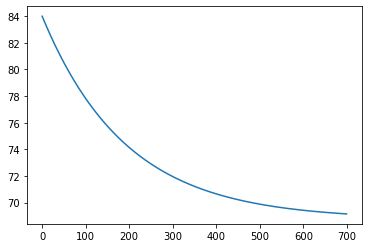

In [41]:
#A continuación un ejemplo
t = np.arange(0., 700, 1) #Creamos un rango de dias
plt.plot(t,modelo_dieta(2750,84,t)) #Evaluamos el rango en dichos dias
plt.show() #Mostramos la gráfica

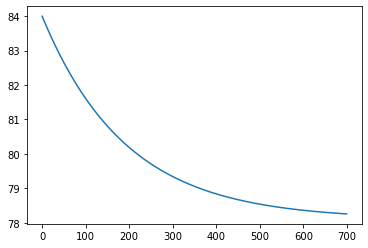

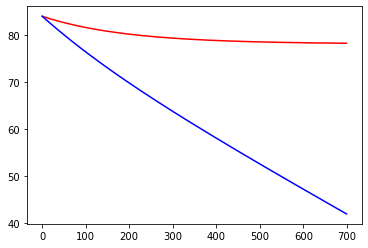

In [56]:
#Para el caso de Omar que tiene peso de 85kg, una altura de 1.74 y un IMC de 28.405 harémos su gráfica con su dieta sin ejercicio
t=np.arange(0,700,1)
plt.plot(t,modelo_dieta(3124,84,t)) #Evaluamos el rango en dichos dias
plt.show() #Mostramos la gráfica

#Ahora hacemos lo mismo pero suponiendo que practique futbol todos los días y que gaste las calorias de la actividad física
plt.plot(t,modelo_dieta(3124,84,t),'r') 
plt.plot(t,modelo_dietayejercicio(3124,84,t,400/7700),'b')
plt.show()

#Observamos que baja de peso mucho mas rápido y aproximadamente en 100 dias se encontraría en su peso ideal, 75kg, el límite de lo que puede bajar son hasta que llegué a 70kg

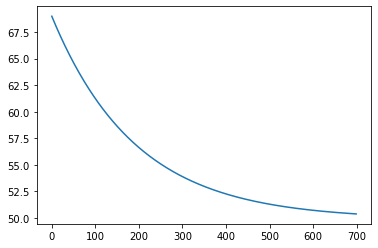

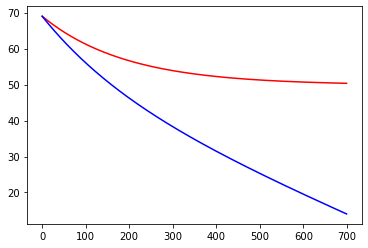

In [57]:
#Repetimos para el caso de Max que pesa 69kg, tiene una altura de 1.85 y un IMC de 20.16 como ya se encuentra en su peso ideal no calcularemos el día en que lo estará con su dieta

t=np.arange(0,700,1)
plt.plot(t,modelo_dieta(1994,69,t)) #Evaluamos el rango en dichos dias
plt.show() #Mostramos la gráfica

#Ahora hacemos lo mismo pero suponiendo que practique futbol todos los días y que gaste las calorias de la actividad física
plt.plot(t,modelo_dieta(1994,69,t),'r') 
plt.plot(t,modelo_dietayejercicio(1994,69,t,400/7700),'b')
plt.show()

#Observamos que baja de peso mucho mas rápido por la actividad física sin embargo, ya se encuentra en el límite inferior así que no tiene sentido bajar mucho mas de peso

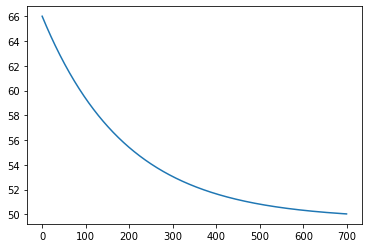

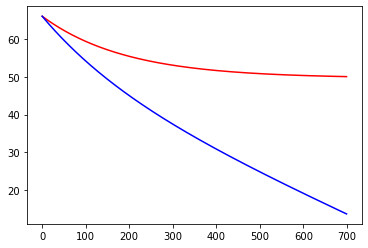

In [59]:
#Repetimos lo anterior para el caso de Nadia con 66kg y 1.68 de altura con un IMC de 23.38
t=np.arange(0,700,1)
plt.plot(t,modelo_dieta(1984,66,t)) #Evaluamos el rango en dichos dias
plt.show() #Mostramos la gráfica

#Ahora hacemos lo mismo pero suponiendo que practique futbol todos los días y que gaste las calorias de la actividad física
plt.plot(t,modelo_dieta(1984,66,t),'r') 
plt.plot(t,modelo_dietayejercicio(1984,66,t,400/7700),'b')
plt.show()
#En este caso se encuentra dentro del rango saludable en el limite superior, nuevamente baja de peso de forma mas rápida con actividad física y puede bajar en este caso hasta aproximadamente 50kg

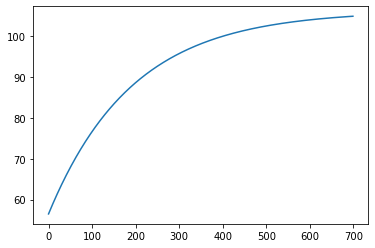

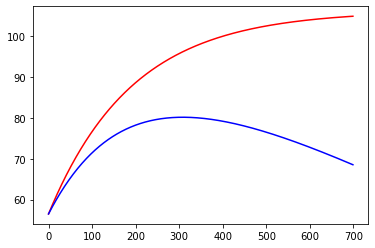

In [61]:
#Repetimos para el caso de Macip con 56.5kg de peso y unA ALTURA DE 1.65
t=np.arange(0,700,1)
plt.plot(t,modelo_dieta(4246,56.5,t)) #Evaluamos el rango en dichos dias
plt.show() #Mostramos la gráfica

#Ahora hacemos lo mismo pero suponiendo que practique futbol todos los días y que gaste las calorias de la actividad física
plt.plot(t,modelo_dieta(4246,56.5,t),'r') 
plt.plot(t,modelo_dietayejercicio(4246,56.5,t,400/7700),'b')
plt.show()
#En este caso podemos observar que macip aumentará de peso con su dieta actual, puede subir su peso hasta 70kg para mantenerse en el intervalo saludable de IMC

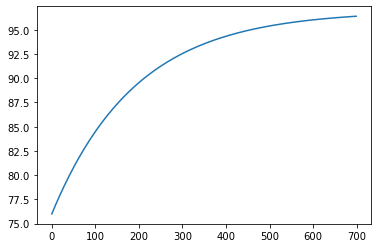

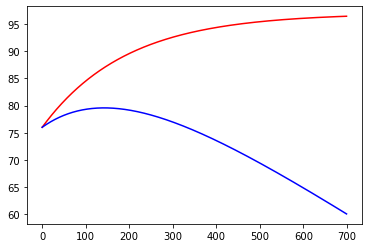

In [62]:
#Finalmente para Pedro repetimos el proceso con 76 kilogramos y una altura de 1.74
t=np.arange(0,700,1)
plt.plot(t,modelo_dieta(3878,76,t)) #Evaluamos el rango en dichos dias
plt.show() #Mostramos la gráfica

#Ahora hacemos lo mismo pero suponiendo que practique futbol todos los días y que gaste las calorias de la actividad física
plt.plot(t,modelo_dieta(3878,76,t),'r') 
plt.plot(t,modelo_dietayejercicio(3878,76,t,400/7700),'b')
plt.show()
#En este caso se encuentra arriba del margen y según su dieta, subirá de peso a menos que haga una actividad física.